In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Carregando os dados

In [2]:
df_housing = pd.read_csv('Housing.csv')

In [3]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df_housing.shape

(545, 13)

## Tratando colunas categoricas

In [5]:
def convert_categorical_to_codes(column):
    if column.dtype == "object":
        return column.astype("category").cat.codes
    return column

df_housing = df_housing.apply(convert_categorical_to_codes)

In [6]:
df_housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## Correlação

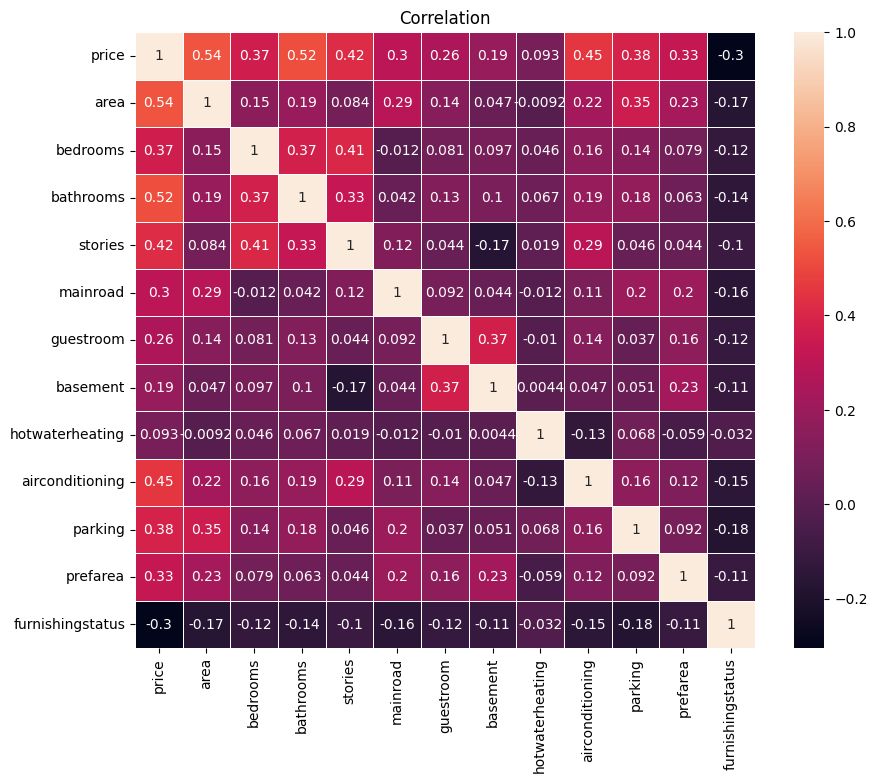

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_housing.corr(), annot=True, linewidth=.5)
plt.title('Correlation')
plt.show()

## Criação do modelo com Outliers

In [8]:
corr_threshold = 0.4

features = [column for column, corr in df_housing.corr()["price"].items() if abs(corr) > corr_threshold and column != "price"]

In [9]:
features

['area', 'bathrooms', 'stories', 'airconditioning']

In [10]:
# Seleciona as características (features) e a variável dependente (target)
X = df_housing[features]  # Variáveis independentes
y = df_housing['price']  # Variável dependente

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adiciona uma constante ao conjunto de treinamento para incluir o intercepto no modelo
X_train_sm = sm.add_constant(X_train)

# Constrói e treina o modelo de regressão linear usando OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Adiciona uma constante ao conjunto de teste para compatibilidade com o modelo treinado
X_test_sm = sm.add_constant(X_test)

# Faz previsões no conjunto de teste
y_pred = model_sm.predict(X_test_sm)

model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     154.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.07e-81
Time:                        21:20:16   Log-Likelihood:                -6694.2
No. Observations:                 436   AIC:                         1.340e+04
Df Residuals:                     431   BIC:                         1.342e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.017e+05      2e+05      2.514      0.012    1.09e+05    8.94e+05
area              317.9245     25.596     12.421      0.000     267.615     368.234
bathrooms        1.254e+06   1.23e+05     10.233      0.000    1.01e+06     1.5e+06
stories           3.84e+05   6.96e+04      5.520      0.000    2.47e+05    5.21e+05
airconditioning  9.569e+05   1.28e+05      7.502      0.000    7.06e+05    1.21e+06
==============================================================================
Omnibus:                       97.520   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.185
Skew:                           1.081   Prob(JB):                     8.63e-57
Kurtosis:                       6.088   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

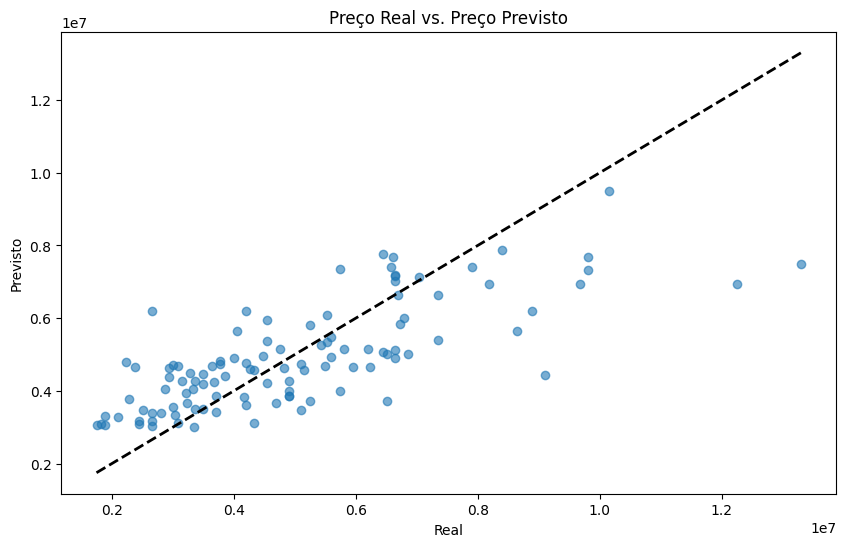

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Preço Real vs. Preço Previsto')
plt.show()

In [12]:
coeficientes_sm = model_sm.params

# Exibindo a equação do modelo
print("Equação do modelo:")
equacao_sm = f"price = {coeficientes_sm['const']:.0f} "  # Acesso ao intercepto de forma segura
for feature in features:
    equacao_sm += f"+ ({coeficientes_sm[feature]:.2f}) * {feature} "

print(equacao_sm)

Equação do modelo:
price = 501704 + (317.92) * area + (1254150.77) * bathrooms + (383973.52) * stories + (956883.14) * airconditioning 


# Modelo sem outliers no preço

## Removendo Outliers de preço

In [13]:
# Calculando o IQR para 'price'
Q1 = df_housing[features + ['price']].quantile(0.25)
Q3 = df_housing[features + ['price']].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para considerar um dado como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando os índices dos dados que não são outliers
non_outliers = ((df_housing[features + ['price']] >= lower_bound) & (df_housing[features + ['price']] <= upper_bound)).all(axis=1)

# Filtrando os dados para remover os outliers
df_housing_filtered = df_housing[non_outliers]

## Correlação (após a remoção dos outliers)

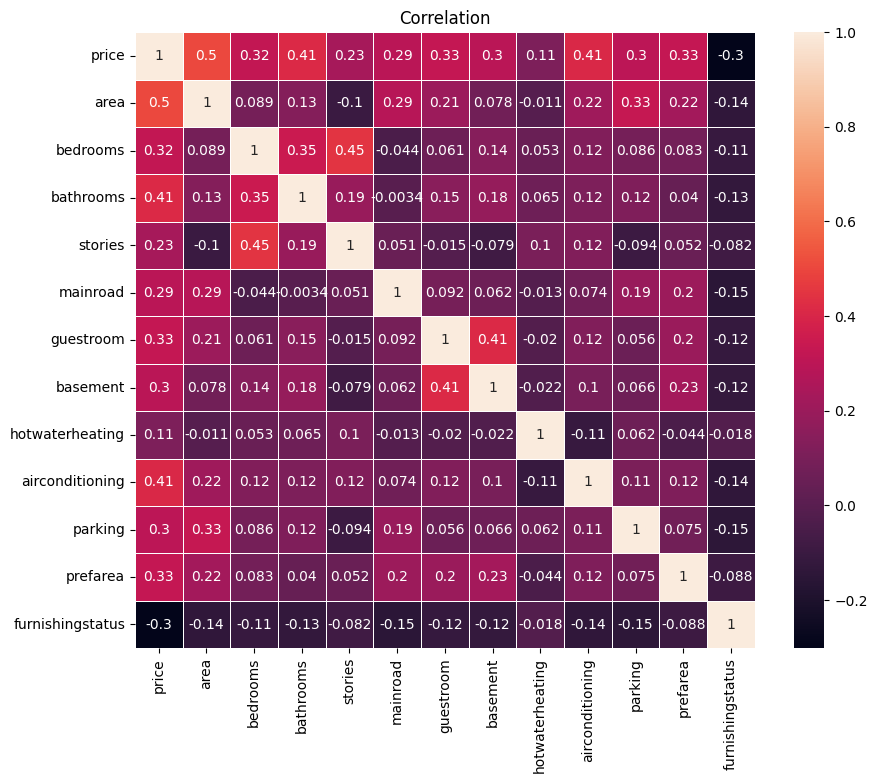

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_housing_filtered.corr(), annot=True, linewidth=.5)
plt.title('Correlation')
plt.show()

## Seleção das features

In [15]:
corr_threshold = 0.4

features = [column for column, corr in df_housing_filtered.corr()["price"].items() if abs(corr) > corr_threshold and column != "price"]

In [16]:
features

['area', 'bathrooms', 'airconditioning']

## Criação do modelo

In [17]:
# Seleciona as características (features) e a variável dependente (target)
X = df_housing_filtered[features]  # Variáveis independentes
y = df_housing_filtered['price']  # Variável dependente

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adiciona uma constante ao conjunto de treinamento para incluir o intercepto no modelo
X_train_sm = sm.add_constant(X_train)

# Constrói e treina o modelo de regressão linear usando OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Adiciona uma constante ao conjunto de teste para compatibilidade com o modelo treinado
X_test_sm = sm.add_constant(X_test)

# Faz previsões no conjunto de teste
y_pred = model_sm.predict(X_test_sm)

model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.84e-49
Time:                        21:20:17   Log-Likelihood:                -5887.7
No. Observations:                 385   AIC:                         1.178e+04
Df Residuals:                     381   BIC:                         1.180e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.315e+06   2.01e+05      6.531      0.000    9.19e+05    1.71e+06
area              287.6710     30.136      9.546      0.000     228.416     346.926
bathrooms        1.179e+06   1.24e+05      9.543      0.000    9.36e+05    1.42e+06
airconditioning  9.411e+05   1.27e+05      7.426      0.000    6.92e+05    1.19e+06
==============================================================================
Omnibus:                       43.645   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.320
Skew:                           0.754   Prob(JB):                     1.08e-14
Kurtosis:                       4.318   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

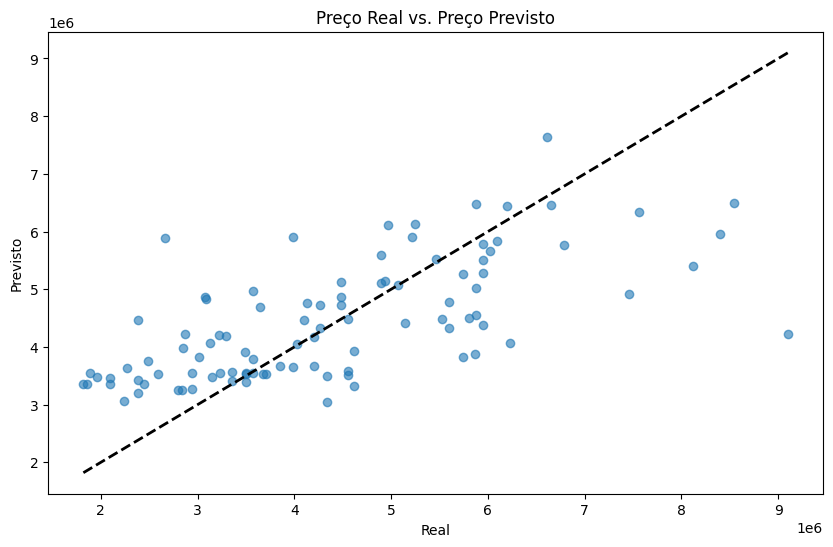

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Preço Real vs. Preço Previsto')
plt.show()

In [19]:
coeficientes_sm = model_sm.params

# Exibindo a equação do modelo
print("Equação do modelo:")
equacao_sm = f"price = {coeficientes_sm['const']:.0f} "  # Acesso ao intercepto de forma segura
for feature in features:
    equacao_sm += f"+ ({coeficientes_sm[feature]:.2f}) * {feature} "

print(equacao_sm)

Equação do modelo:
price = 1315287 + (287.67) * area + (1179181.78) * bathrooms + (941062.92) * airconditioning 
